# Relax Challenge
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period , identify which factors predict future user adoption .

We suggest spending 1-2 hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from collections import Counter

In [67]:
# Read CSV
user_engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding='latin1') # 'utf-8' error! Use encoding latin1

In [85]:
user_engagement.head(15)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [69]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [70]:
print('{} of unique users who ever used the application.'\
      .format(len(list(user_engagement['user_id'].unique()))))
print('{} of unique users who signed up.'\
      .format(len(list(users['object_id'].unique()))))
print('{} of user used the application but did not sign up.'\
     .format(len(users[users['last_session_creation_time'].isnull()])))

8823 of unique users who ever used the application.
12000 of unique users who signed up.
3177 of user used the application but did not sign up.


In [72]:
print(user_engagement.describe())
print('\n')
print(user_engagement.isnull().any())
print('\n')
print('users')
print(users.isnull().any())

             user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0


time_stamp    False
user_id       False
visited       False
dtype: bool


users
object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
dtype: bool


In [75]:
print('User Engagement Info')
print(user_engagement.info())
print('\n')
print('User Info')
print(users.info())

User Engagement Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None


User Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None

In [77]:
#Time to datetime the date
user_engagement['time_stamp']=pd.to_datetime(user_engagement['time_stamp'])

In [88]:
seven_days = datetime.timedelta(7)
adopted_dict = {}

for user_id in sorted(list(user_engagement['user_id'].unique())):
    
    adopted_user = False
    temp = user_engagement[user_engagement['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted_user == True:
            continue
        this_time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= this_time) & (temp['time_stamp'] <= (this_time + seven_days))]) >= 3:
            adopted_user = True
    
    adopted_dict[user_id] = adopted_user

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [109]:
adopted = pd.DataFrame.from_dict(Counter(list(adopted_dict.values())), orient='index').reset_index()
print(adopted)

print('\n')
# Percentage of adopted users
print('From the users.csv, we have found'\
      , len(list(user_engagement['user_id'].unique())), 'unique users.')
print(round((adopted.loc[1][1]/(adopted.loc[1][1]+adopted.loc[0][1])*100),2), 'of users adopted the application.')

   index     0
0  False  7167
1   True  1656


From the users.csv, we have found 8823 unique users.
18.77 of users adopted the application.


In [140]:
# Change dict into DataFrame
adopted_df = pd.DataFrame.from_dict(adopted_dict, orient='index')

In [156]:
# Create new column for user_id from index, and renaming the colujmns
adopted_df['user_id']=adopted_df.index
adopted_df.columns = ['adopted', 'user_id']

In [157]:
# Replace column name in users for merging
users.rename(columns={'object_id': 'user_id'}, inplace=True)

In [158]:
# Merge adopted and users to create new dataframe with adopted user
users_df = users.merge(adopted_df, how='left', on='user_id' )

In [159]:
users_df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


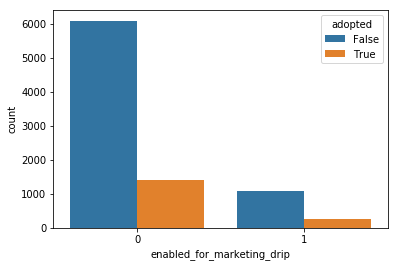

In [160]:
# Plotting the new dataframe and find impact of different features
sns.countplot(x='enabled_for_marketing_drip', hue='adopted', data=users_df)

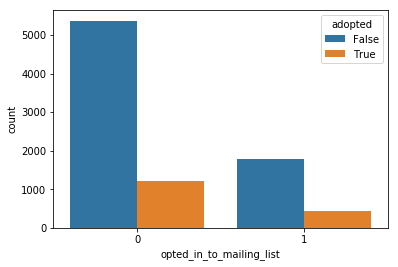

In [161]:
# Plotting the new dataframe and find impact of different features
sns.countplot(x='opted_in_to_mailing_list', hue='adopted', data=users_df)

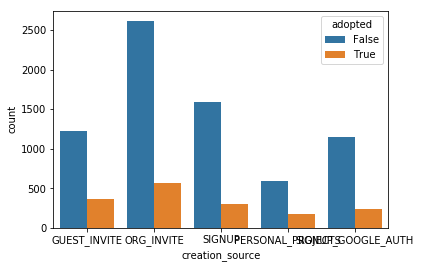

In [162]:
sns.countplot(x='creation_source', hue='adopted', data=users_df)

In [ ]:
Preliminary Findings:
    
18.77% of People adopted the applications.

A logistical regression can help split the data an